In [1]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

sent2_raster = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/Sentinel_2_SampleData.tif")

sent2_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1024,
 'height': 512,
 'count': 13,
 'crs': CRS.from_epsg(32652),
 'transform': Affine(10.0, 0.0, 285440.0,
        0.0, -10.0, 4139120.0)}

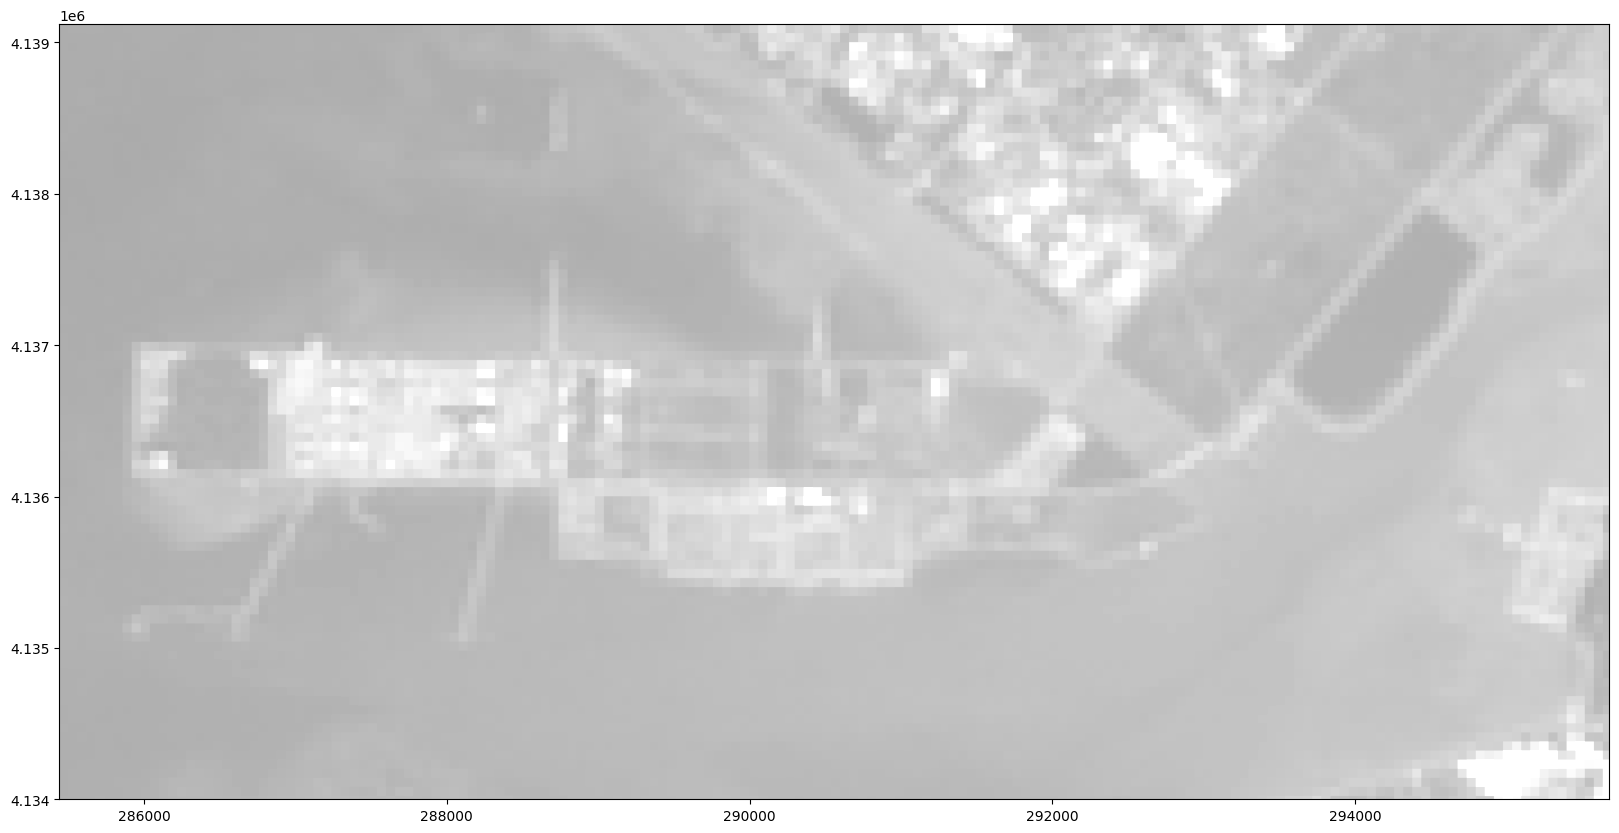

In [2]:
sent2_arr = sent2_raster.read()

vmin, vmax = np.nanpercentile(sent2_arr, (5, 95))
plt.figure(figsize=[20,20])
show(sent2_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

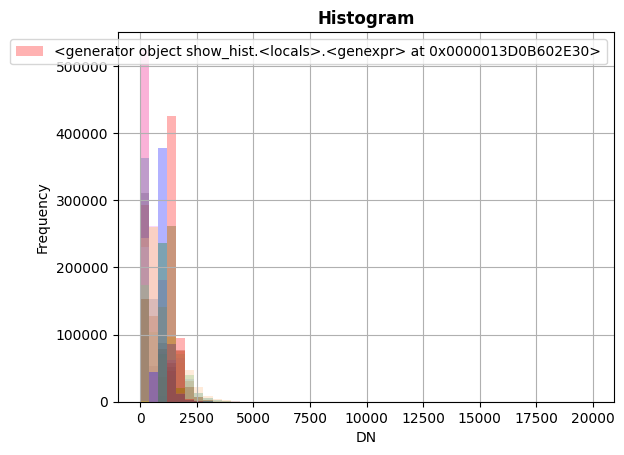

In [3]:
from rasterio import plot

plot.show_hist(sent2_raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

In [4]:
imgxyb = np.empty((sent2_raster.height, sent2_raster.width, sent2_raster.count), sent2_raster.meta['dtype'])

for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = sent2_raster.read(band+1)

In [5]:
imgxyb.shape

(512, 1024, 13)

In [6]:
img1d = imgxyb[:,:,:13].reshape((imgxyb.shape[0]*imgxyb.shape[1], imgxyb.shape[2]))
img1d.shape

(524288, 13)

In [7]:
cl = cluster.KMeans(n_clusters=4)
param = cl.fit(img1d)
cl.labels_

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 3, 3])

In [9]:
img_cl = cl.labels_
img_cl = img_cl.reshape(imgxyb[:,:,0].shape)

In [10]:
img_cl.shape

(512, 1024)

In [11]:
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['green', 'blue', 'red', 'yellow'])

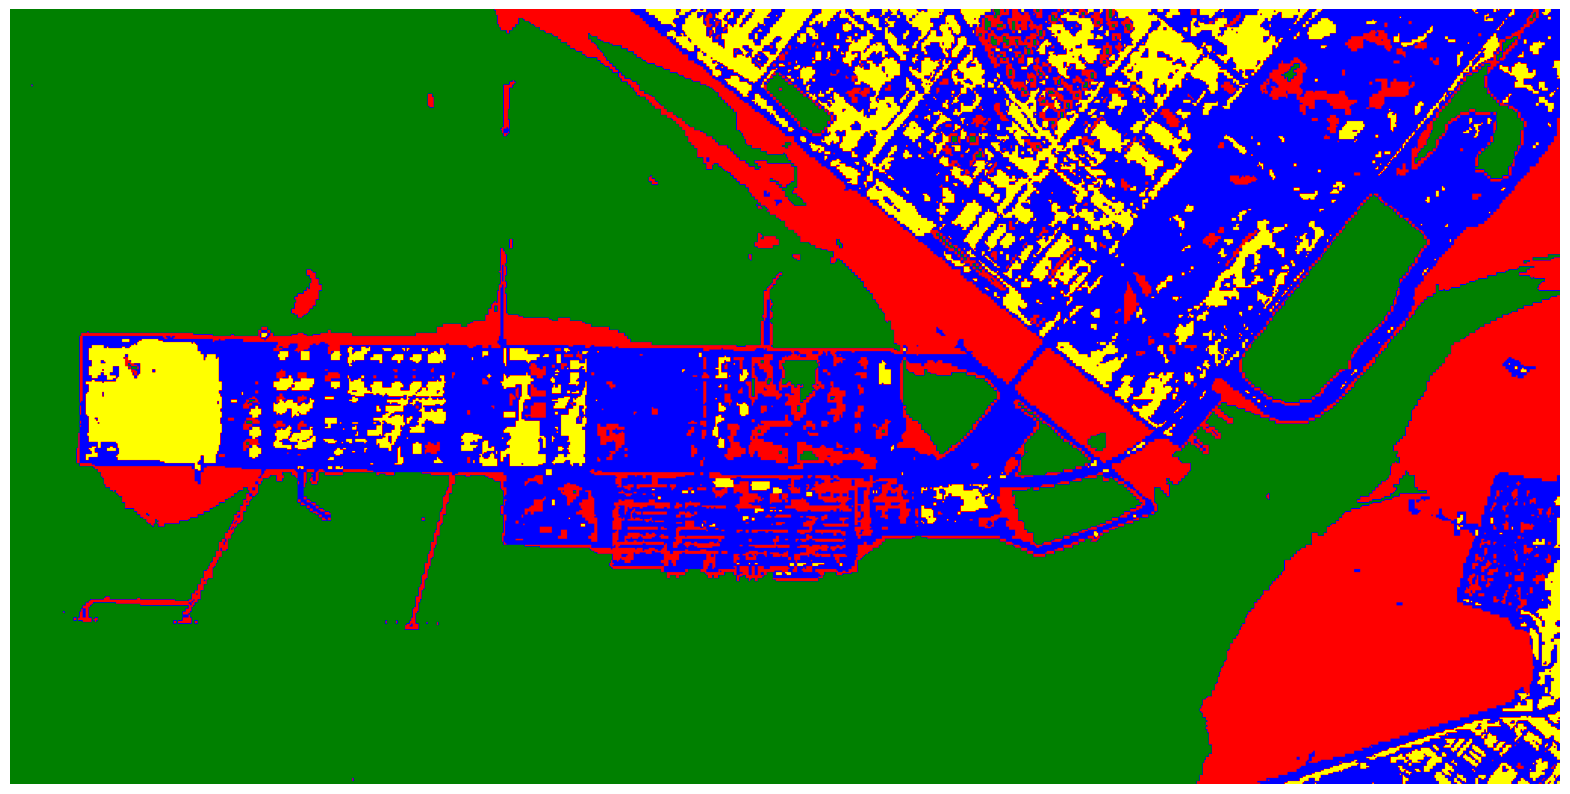

In [12]:
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig('sent2_KMeans_clustered.jpg', bbox_inches='tight')
plt.show()

C:\Users\user\miniconda3\envs\py\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


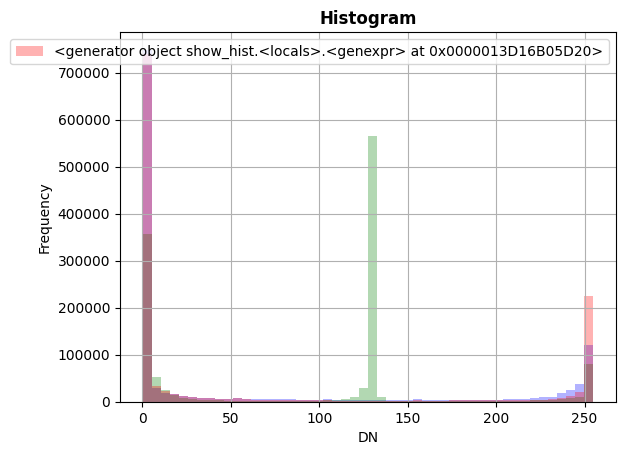

In [13]:
el_clust = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/sent2_KMeans_clustered.jpg")

plot.show_hist(el_clust, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

In [14]:
unseen_sent2 = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/subset_S2B_MSIL1C_20180601_yakutsk.tif")

In [15]:
unseen_sent2_arr = unseen_sent2.read()

In [16]:
vmin, vmax = np.nanpercentile(unseen_sent2_arr, (5, 95))
unseen_sent2.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 13,
 'crs': CRS.from_epsg(32652),
 'transform': Affine(10.0, 0.0, 532340.0,
        0.0, -10.0, 6877540.0)}

In [19]:
unseen_sent2_xyb = np.empty((unseen_sent2.height, unseen_sent2.width, unseen_sent2.count), unseen_sent2.meta['dtype'])

for band in range(unseen_sent2_xyb.shape[2]):
    unseen_sent2_xyb[:,:,band] = unseen_sent2.read(band+1)
    
unseen_sent2_1d = unseen_sent2_xyb[:,:,:13].reshape(unseen_sent2_xyb.shape[0]*unseen_sent2_xyb.shape[1], unseen_sent2_xyb.shape[2])

unseen_sent2_1d

array([[1471, 1216, 1083, ...,   42, 2528, 1761],
       [1471, 1231, 1101, ...,   41, 2565, 1833],
       [1471, 1257, 1153, ...,   40, 2602, 1905],
       ...,
       [1163,  819,  580, ...,   18,  127,   85],
       [1152,  808,  580, ...,   18,  122,   75],
       [1151,  823,  579, ...,   18,  119,   71]], dtype=uint16)

In [20]:
pred = cl.predict(unseen_sent2_1d)

unseen_sent2_clu = pred
unseen_sent2_clu = unseen_sent2_clu.reshape(unseen_sent2_xyb[:,:,0].shape)

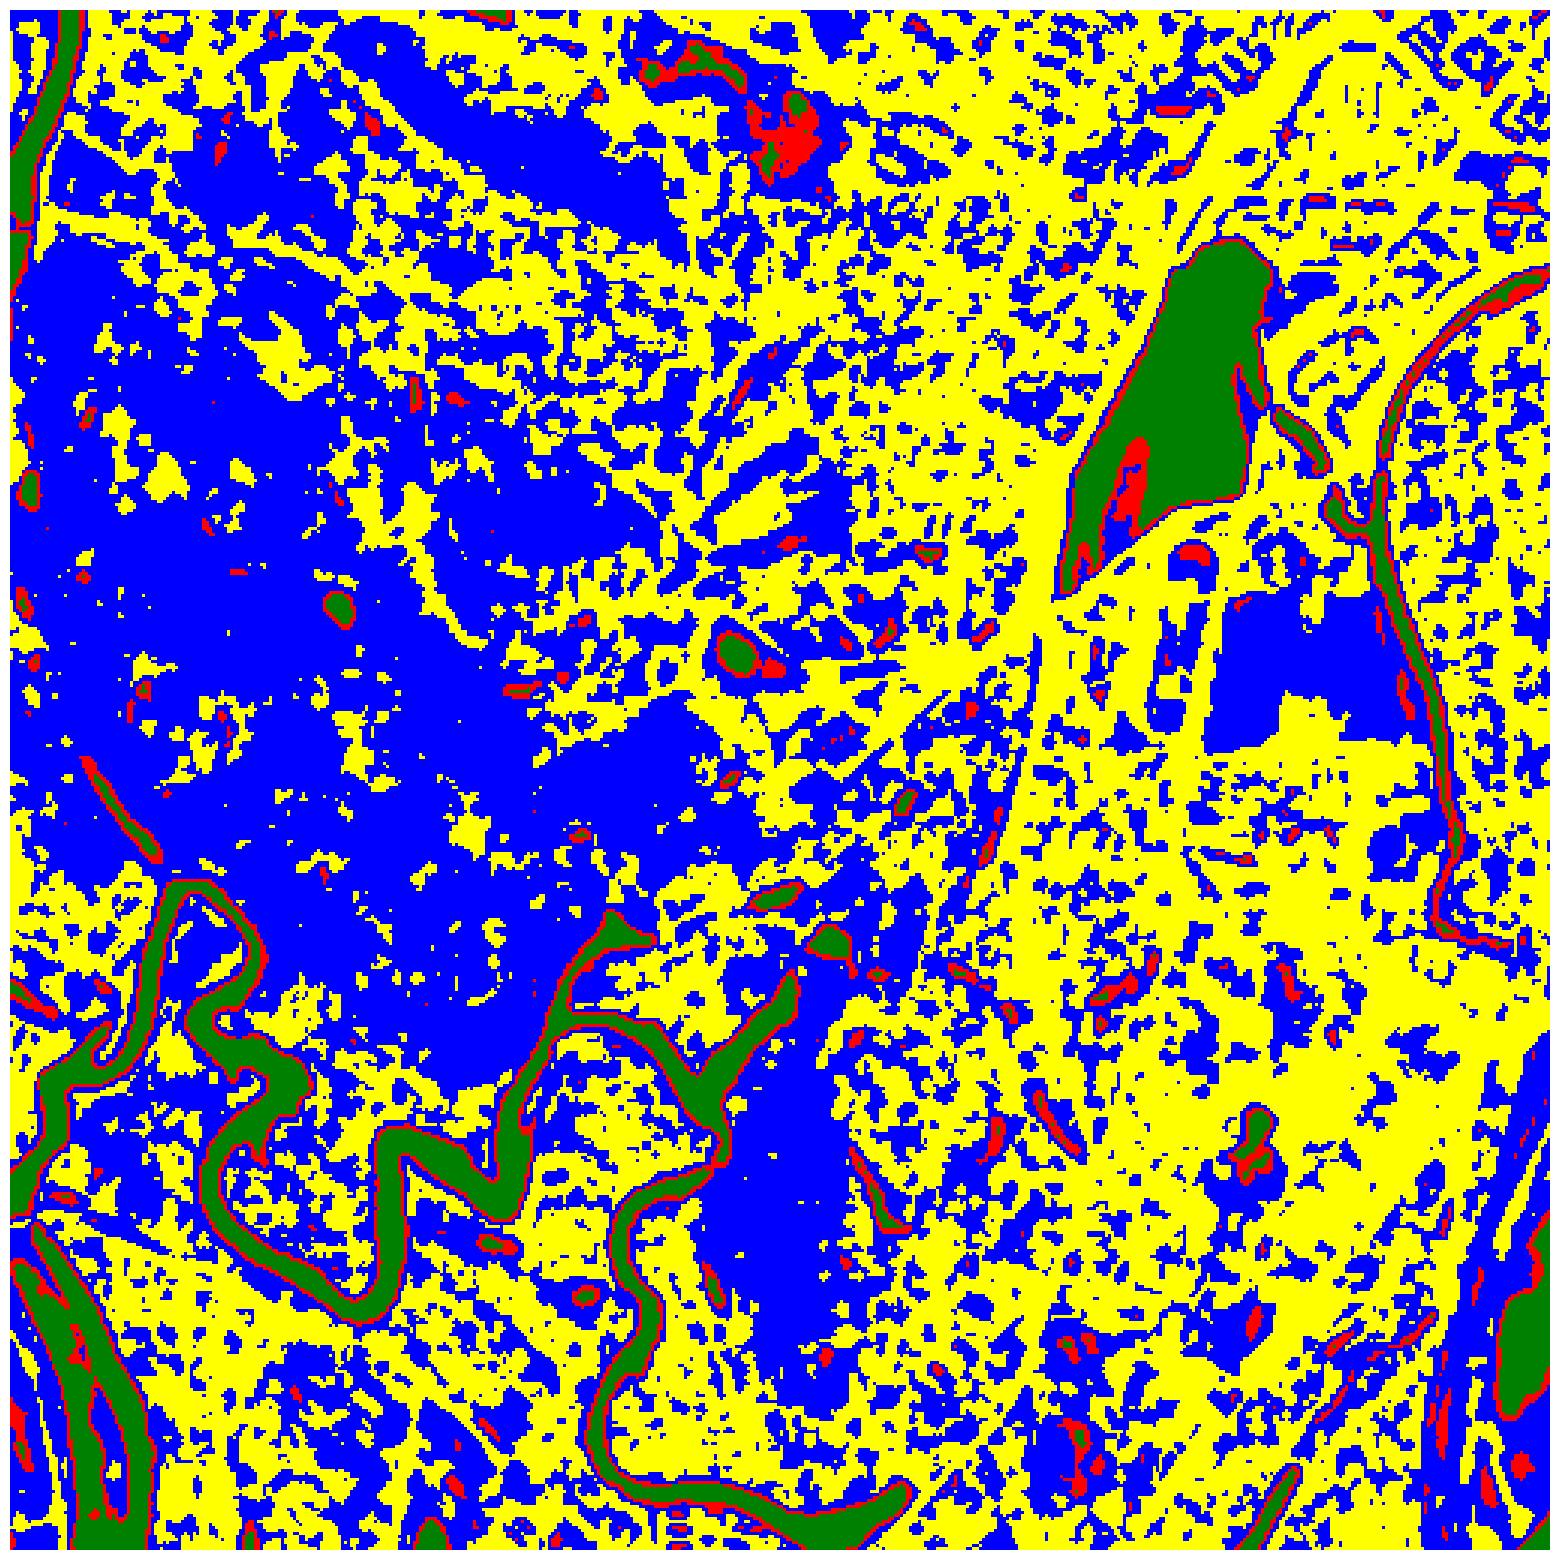

In [21]:
plt.figure(figsize=[20,20])
plt.imshow(unseen_sent2_clu, cmap=cmap)
plt.axis('off')
plt.savefig('unseen_sent2_clue_4.jpg', bbox_inches='tight')
plt.show()

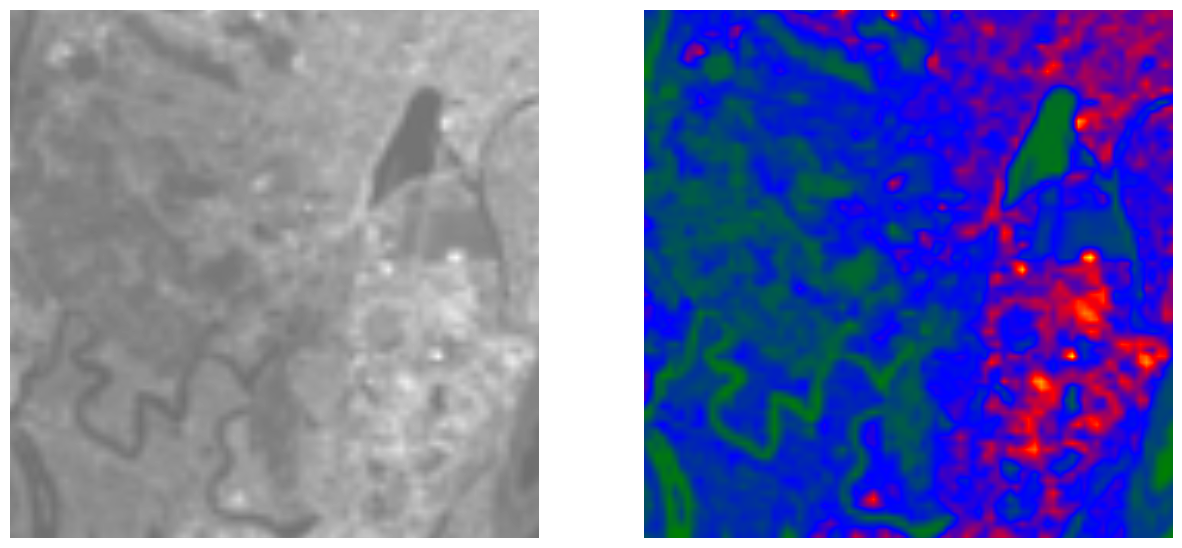

In [22]:
fig, (ax1,ax2) = plt.subplots(figsize=[15,15], nrows=1,ncols=2, sharey=False,)
show(unseen_sent2, cmap='gray', vmin=vmin, vmax=vmax, ax=ax1)
show(unseen_sent2, cmap=cmap, ax=ax2)
ax1.set_axis_off()
ax2.set_axis_off()
fig.savefig("pred_unseen_sent2_clue_4.jpg", bbox_inches='tight')
plt.show()

C:\Users\user\miniconda3\envs\py\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


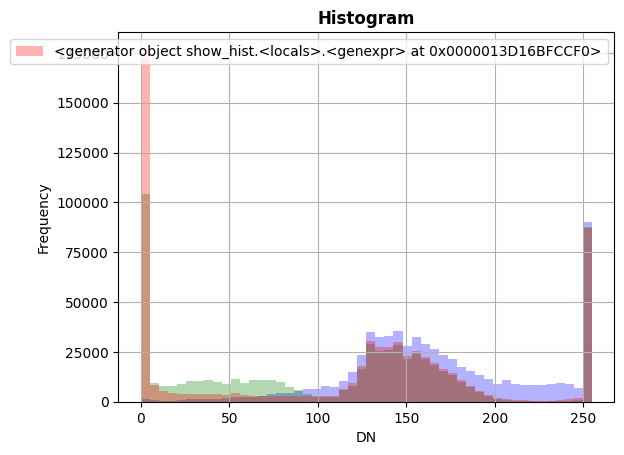

In [23]:
el_clust2 = rio.open("C:/Users/user/python_machine_learning/파이썬 기반 머신러닝/pred_unseen_sent2_clue_4.jpg")

plot.show_hist(el_clust2, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')